In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

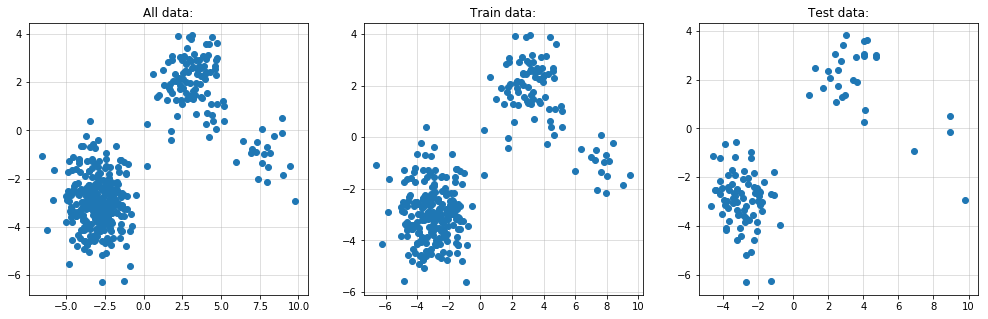

In [2]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 300),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 20)))
np.random.shuffle(X)
n, _ = X.shape

X_train = X[:int(n * 0.75), :]
X_test = X[int(n * 0.75):, :]

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
axes[0].plot(X[:, 0], X[:, 1], 'o')
axes[0].set_title('All data:')
axes[1].plot(X_train[:, 0], X_train[:, 1], 'o')
axes[1].set_title('Train data:')
axes[2].plot(X_test[:, 0], X_test[:, 1], 'o')
axes[2].set_title('Test data:')
for i in range(3):
    axes[i].grid(alpha=0.5)
plt.show()

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

In [3]:
from anomatools.anomaly_detection import SSDO

from anomatools.utils.plotting import plot_2D_classifier, plot_2D_normals_anomalies

## Unsupervised SSDO

First, lets detect outliers using SSDO without providing any label information. We suspect about 10 percent of the data to be anomalous.

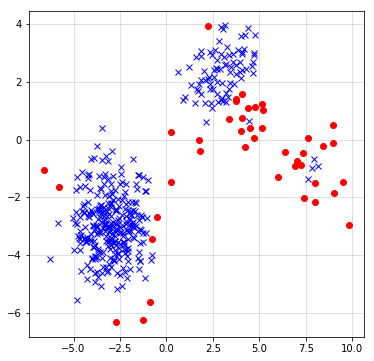

In [4]:
# no labels
y = np.zeros(len(X))

# construct detector and find outliers
detector = SSDO(contamination=0.1, unsupervised_prior='ssdo')
y_score, y_pred = detector.fit_predict(X, y)

# plot anomalies
plot_2D_normals_anomalies(X, y_pred)

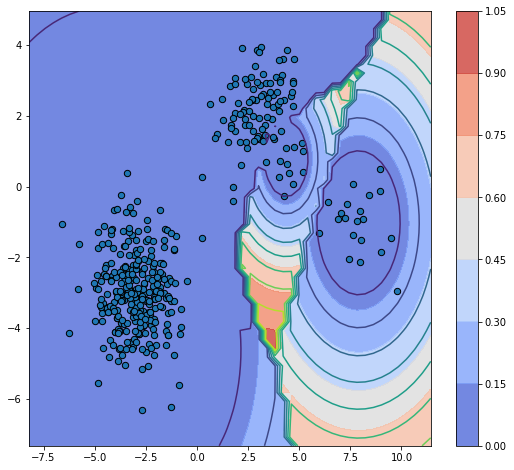

In [5]:
# draw decision boundary
detector = SSDO(contamination=0.1, unsupervised_prior='ssdo')
plot_2D_classifier(detector, X, y, figure_size=(9, 8))

## Semi-supervised SSDO with SSDO unsupervised prior

Now let us provide some labels: we, as user, know that cluster 3 is in fact normal, while cluster 2 is anomalous. We can give this information to SSDO. This time, there are actually more anomalies in the data because cluster 2 is larger than cluster 1.

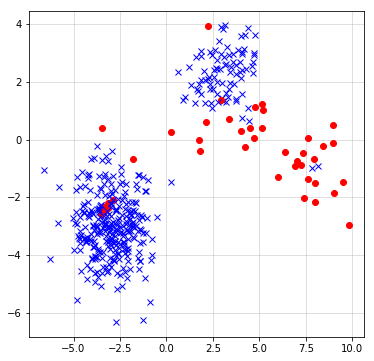

In [6]:
# let's add labels
y = np.zeros(len(X), dtype=int)
y[-5:] = -1
y[-40:-35] = 1

# construct detector and find outliers
detector = SSDO(contamination=0.1, unsupervised_prior='ssdo')
y_score, y_pred = detector.fit_predict(X, y)

# plot anomalies
plot_2D_normals_anomalies(X, y_pred)

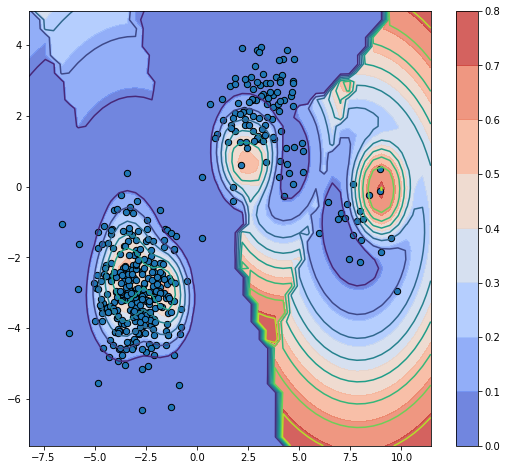

In [7]:
# draw decision boundary
detector = SSDO(contamination=0.1, unsupervised_prior='ssdo')
plot_2D_classifier(detector, X, y, figure_size=(9, 8))

## Semi-supervised SSDO with IsolationForest as the unsupervised classifier

Now we use the prior from iForest in combination with the label information to compute the final anomaly scores.

In [8]:
from sklearn.ensemble import IsolationForest

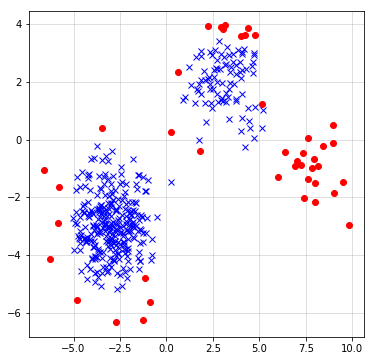

In [9]:
# no labels
y = np.zeros(len(X))

# unsupervised prior is provided by the isolation forest
prior_detector = IsolationForest(behaviour='new', contamination=0.1)
prior_detector.fit(X)
prior_scores = prior_detector.decision_function(X) * -1

# construct detector and find outliers
detector = SSDO(contamination=0.1, unsupervised_prior='other')
y_score, y_pred = detector.fit_predict(X, y, prior=prior_scores)

# plot anomalies
plot_2D_normals_anomalies(X, y_pred)